# GPMol overview

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'/home/beangoben/projects/gpmol')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["font.family"] = "Century Gothic"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['text.usetex'] = False 
plt.rcParams['mathtext.rm'] = "Century Gothic"
plt.rcParams['mathtext.it'] = "Century Gothic:italic"
plt.rcParams['mathtext.bf'] = "Century Gothic:bold"
plt.rcParams['axes.unicode_minus'] =  False

In [3]:
from IPython.display import display

import numpy as np
import pandas as pd
import gpmol as gpm
from gpmol.utils.plotting import *

gpm.logging.set_level('warning')
gpm.plot_settings()
gpm.pandas_settings()

Running in Jupyter notebook 


# Traing PM7+GP rxn calibration
## Data labels

In [15]:
calc_type = 'PM7'
target='ORP_exp'
baseline ='ORP_{}'.format(calc_type)
linfit ='ORP_PM7linfit'
diff_label= 'ORP_diff'
calib_label='ORP_PM7GP'

## Load a Dataset

In [10]:
df = pd.read_csv('data/redox_calibration.csv')
features=[target,baseline,'category','KEGG_ID2','smiles_r','smiles_l']
linear_fit = np.poly1d(np.polyfit(df[baseline],df[target],1))
df[linfit]=linear_fit(df[baseline])
df[diff_label]=df[target]-df[linfit]
print(df.shape)
df.head()

(80, 13)


,KEGG_ID1,KEGG_ID2,category,ORP_exp,KEGG_l,KEGG_r,smiles_r,smiles_l,ORP_GCM,ORP_PM7,ORP_DLPNO,ORP_PM7linfit,ORP_diff
0,C00280 + C00282 = C00535,C00280 = C00535,2,-318,['C00280'],['C00535'],C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@]34C)[C@...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@]34C)[C@...,-293.25,-866.22,nan,-238.51,-79.49
1,C00468 + C00282 = C00951,C00468 = C00951,2,-308,['C00468'],['C00951'],C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc34)[C@@H]1CC...,C[C@]12CC[C@H]3[C@@H](CCc4cc(O)ccc34)[C@@H]1CC...,-293.25,-833.86,-44.26,-233.72,-74.28
2,C00207 + C00282 = C01845,C00207 = C01845,2,-295,['C00207'],['C01845'],CC(C)O,CC(C)=O,-219.05,-943.17,-11.79,-249.90,-45.10
3,C00414 + C00282 = C00854,C00414 = C00854,2,-289,['C00414'],['C00854'],OC1CCCCC1,O=C1CCCCC1,-293.25,-895.41,5.70,-242.83,-46.17
4,C03067 + C00282 = C03351,C03067 = C03351,2,-285,['C03067'],['C03351'],OCc1cccc(O)c1,Oc1cccc(C=O)c1,-206.31,-684.67,21.76,-211.64,-73.36


## Create preprocessor pipeline

In [12]:
from gpmol.features import RegressionTarget, RxnFP, Properties
from gpmol.data_transforms import SMILES2MOL

preproc = gpm.Preprocessor(df)
preproc.append([
    SMILES2MOL('smiles_r','mol_r'),
    SMILES2MOL('smiles_l','mol_l'),
    RegressionTarget(col_labels=diff_label,units='mV'),
    RxnFP(cols=['mol_r','mol_l'],rxnfp_type='diff',fp_type='count-morgan',fp_args={'nBits': 2048, 'radius': 6})
])

,Name,Type,cols,n_dim,preprocessing,GP,Meta-data
0,ORP_diff,Regression,ORP_diff,1,Standardize,likelihood = Gaussian,units = mV
1,RxnFP,RxnFP,mol_r/mol_l,129,,kernel = RBF,"fp_args = {'nBits': 2048, 'radius': 6}, fp_typ..."


## optimize hyperparameters

Shape of x must be 2D at computation. 




Adam:   0%|          | 0/10000 [00:00<?, ?it/s]

Adam:   0%|          | 1/10000 [00:00<28:34,  5.83it/s]

Adam:   0%|          | 1/10000 [00:00<28:34,  5.83it/s, ll=-1.27e+02, Δ=-1.27e+02]

Adam:   0%|          | 2/10000 [00:00<28:34,  5.83it/s, ll=-1.25e+02, Δ=1.87e+00] 

Adam:   0%|          | 3/10000 [00:00<28:33,  5.83it/s, ll=-1.23e+02, Δ=1.87e+00]

Adam:   0%|          | 4/10000 [00:00<28:33,  5.83it/s, ll=-1.22e+02, Δ=1.87e+00]

Adam:   0%|          | 5/10000 [00:00<28:33,  5.83it/s, ll=-1.20e+02, Δ=1.85e+00]

Adam:   0%|          | 6/10000 [00:00<28:33,  5.83it/s, ll=-1.18e+02, Δ=1.81e+00]

Adam:   0%|          | 7/10000 [00:00<28:33,  5.83it/s, ll=-1.16e+02, Δ=1.76e+00]

Adam:   0%|          | 8/10000 [00:00<28:33,  5.83it/s, ll=-1.15e+02, Δ=1.68e+00]

Adam:   0%|          | 9/10000 [00:00<20:36,  8.08it/s, ll=-1.15e+02, Δ=1.68e+00]

Adam:   0%|          | 9/10000 [00:00<20:36,  8.08it/s, ll=-1.13e+02, Δ=1.58e+00]

Adam:   0%|          | 10/10000 [00:00<20:36,  8.08it/s, ll=

Adam:   1%|          | 85/10000 [00:00<05:45, 28.66it/s, ll=-9.53e+01, Δ=1.22e-02]

Adam:   1%|          | 86/10000 [00:00<05:45, 28.66it/s, ll=-9.53e+01, Δ=1.23e-02]

Adam:   1%|          | 87/10000 [00:00<04:19, 38.13it/s, ll=-9.53e+01, Δ=1.23e-02]

Adam:   1%|          | 87/10000 [00:00<04:19, 38.13it/s, ll=-9.53e+01, Δ=1.22e-02]

Adam:   1%|          | 88/10000 [00:00<04:19, 38.13it/s, ll=-9.53e+01, Δ=1.20e-02]

Adam:   1%|          | 89/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=1.17e-02]

Adam:   1%|          | 90/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=1.14e-02]

Adam:   1%|          | 91/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=1.11e-02]

Adam:   1%|          | 92/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=1.07e-02]

Adam:   1%|          | 93/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=1.04e-02]

Adam:   1%|          | 94/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=1.01e-02]

Adam:   1%|          | 95/10000 [00:00<04:19, 38.13it/s, ll=-9.52e+01, Δ=9.7

Adam:   2%|▏         | 170/10000 [00:01<01:46, 92.39it/s, ll=-9.48e+01, Δ=3.65e-03]

Adam:   2%|▏         | 171/10000 [00:01<01:46, 92.39it/s, ll=-9.47e+01, Δ=3.61e-03]

Adam:   2%|▏         | 172/10000 [00:01<01:46, 92.39it/s, ll=-9.47e+01, Δ=3.58e-03]

Adam:   2%|▏         | 173/10000 [00:01<01:46, 92.39it/s, ll=-9.47e+01, Δ=3.55e-03]

Adam:   2%|▏         | 174/10000 [00:01<01:46, 92.39it/s, ll=-9.47e+01, Δ=3.52e-03]

Adam:   2%|▏         | 175/10000 [00:01<01:32, 106.40it/s, ll=-9.47e+01, Δ=3.52e-03]

Adam:   2%|▏         | 175/10000 [00:01<01:32, 106.40it/s, ll=-9.47e+01, Δ=3.49e-03]

Adam:   2%|▏         | 176/10000 [00:01<01:32, 106.40it/s, ll=-9.47e+01, Δ=3.45e-03]

Adam:   2%|▏         | 177/10000 [00:01<01:32, 106.40it/s, ll=-9.47e+01, Δ=3.42e-03]

Adam:   2%|▏         | 178/10000 [00:01<01:32, 106.40it/s, ll=-9.47e+01, Δ=3.39e-03]

Adam:   2%|▏         | 179/10000 [00:01<01:32, 106.40it/s, ll=-9.47e+01, Δ=3.36e-03]

Adam:   2%|▏         | 180/10000 [00:01<01:32, 106.40it/s, 

Adam:   3%|▎         | 254/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.91e-03]

Adam:   3%|▎         | 255/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.90e-03]

Adam:   3%|▎         | 256/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.89e-03]

Adam:   3%|▎         | 257/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.87e-03]

Adam:   3%|▎         | 258/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.86e-03]

Adam:   3%|▎         | 259/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.85e-03]

Adam:   3%|▎         | 260/10000 [00:01<01:07, 144.57it/s, ll=-9.45e+01, Δ=1.84e-03]

Adam:   3%|▎         | 261/10000 [00:01<01:03, 153.35it/s, ll=-9.45e+01, Δ=1.84e-03]

Adam:   3%|▎         | 261/10000 [00:01<01:03, 153.35it/s, ll=-9.45e+01, Δ=1.83e-03]

Adam:   3%|▎         | 262/10000 [00:01<01:03, 153.35it/s, ll=-9.45e+01, Δ=1.81e-03]

Adam:   3%|▎         | 263/10000 [00:01<01:03, 153.35it/s, ll=-9.45e+01, Δ=1.80e-03]

Adam:   3%|▎         | 264/10000 [00:01<01:03, 153.35i

Adam:   3%|▎         | 338/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.18e-03]

Adam:   3%|▎         | 339/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.17e-03]

Adam:   3%|▎         | 340/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.16e-03]

Adam:   3%|▎         | 341/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.16e-03]

Adam:   3%|▎         | 342/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.15e-03]

Adam:   3%|▎         | 343/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.15e-03]

Adam:   3%|▎         | 344/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.14e-03]

Adam:   3%|▎         | 345/10000 [00:02<01:00, 160.91it/s, ll=-9.44e+01, Δ=1.13e-03]

Adam:   3%|▎         | 346/10000 [00:02<00:59, 160.91it/s, ll=-9.44e+01, Δ=1.13e-03]

Adam:   3%|▎         | 347/10000 [00:02<00:59, 160.91it/s, ll=-9.44e+01, Δ=1.12e-03]

Adam:   3%|▎         | 348/10000 [00:02<00:59, 160.91it/s, ll=-9.44e+01, Δ=1.12e-03]

Adam:   3%|▎         | 349/10000 [00:02<00:59, 160.91i

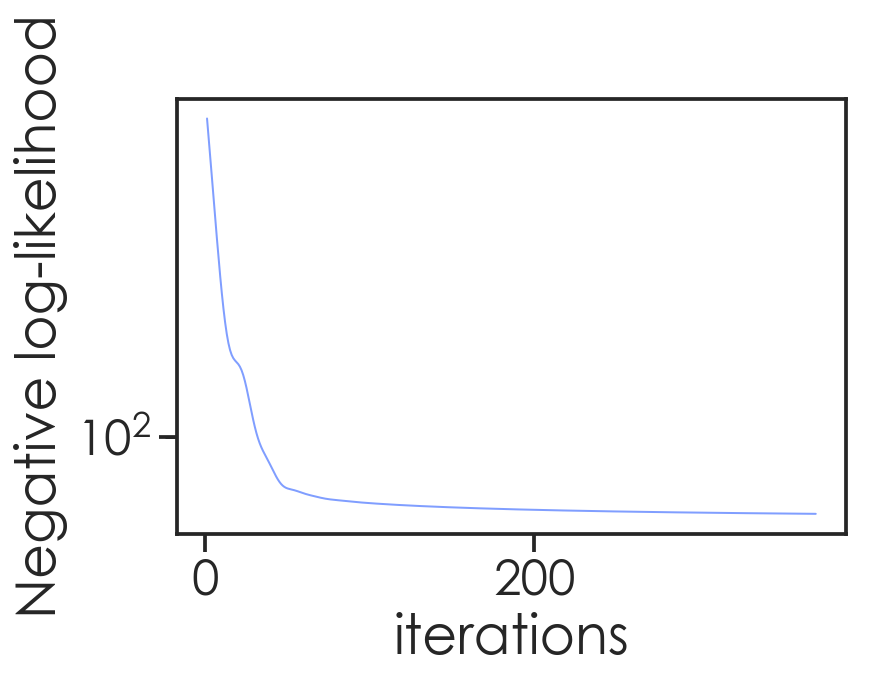

Regression task for ORP_diff

* X shape: (80, 129)
* Y shape: (80, 1)
* Log-likelihood = -94.369167
* Kernel  (3 hyper-parameters)
	0. White Noise
		* variance        = 0.0688
	1. RBF kernel, RxnFP, 129 dims
		* variance        = 5.6754
		* lengthscales    = 6.0176


Adam:   4%|▎         | 371/10000 [00:22<01:04, 148.87it/s, ll=-9.44e+01, Δ=9.99e-04]

In [74]:
gp = preproc.make_gpmol()
gp.minimize()
gp.plot_training_curve()
plt.show()
gp

## Extra: CV-Results

In [12]:
cv_results = gp.cross_validate()
cv_results.update(gp.comparison_suite())
cv_df = gp.summary_results(cv_results,set_tag='CV',trim=True,save=True)
cv_df

Shape of x must be 2D at computation. 


CV: 100%|██████████| 80/80 [07:09<00:00,  9.18s/it]


MAE  AE ($\sigma$)  RMSE    r  $R^2$
Task       Set Target   Approach                                          
Regression CV  ORP_diff GP          22.37          19.29 29.53 0.66   0.43
                        KernelRidge 25.70          19.95 32.53 0.56   0.31
                        Lasso       29.88          25.10 39.02 0.25   0.00
                        SVR         29.38          25.76 39.07 0.12   0.00

## Extra: calibration

In [13]:
df[calib_label]=df[linfit]+cv_results['GP_pred'].flatten()
df[calib_label+'_std']=df[linfit]+cv_results['GP_std'].flatten()

## Extra: comparison

/home/beangoben/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


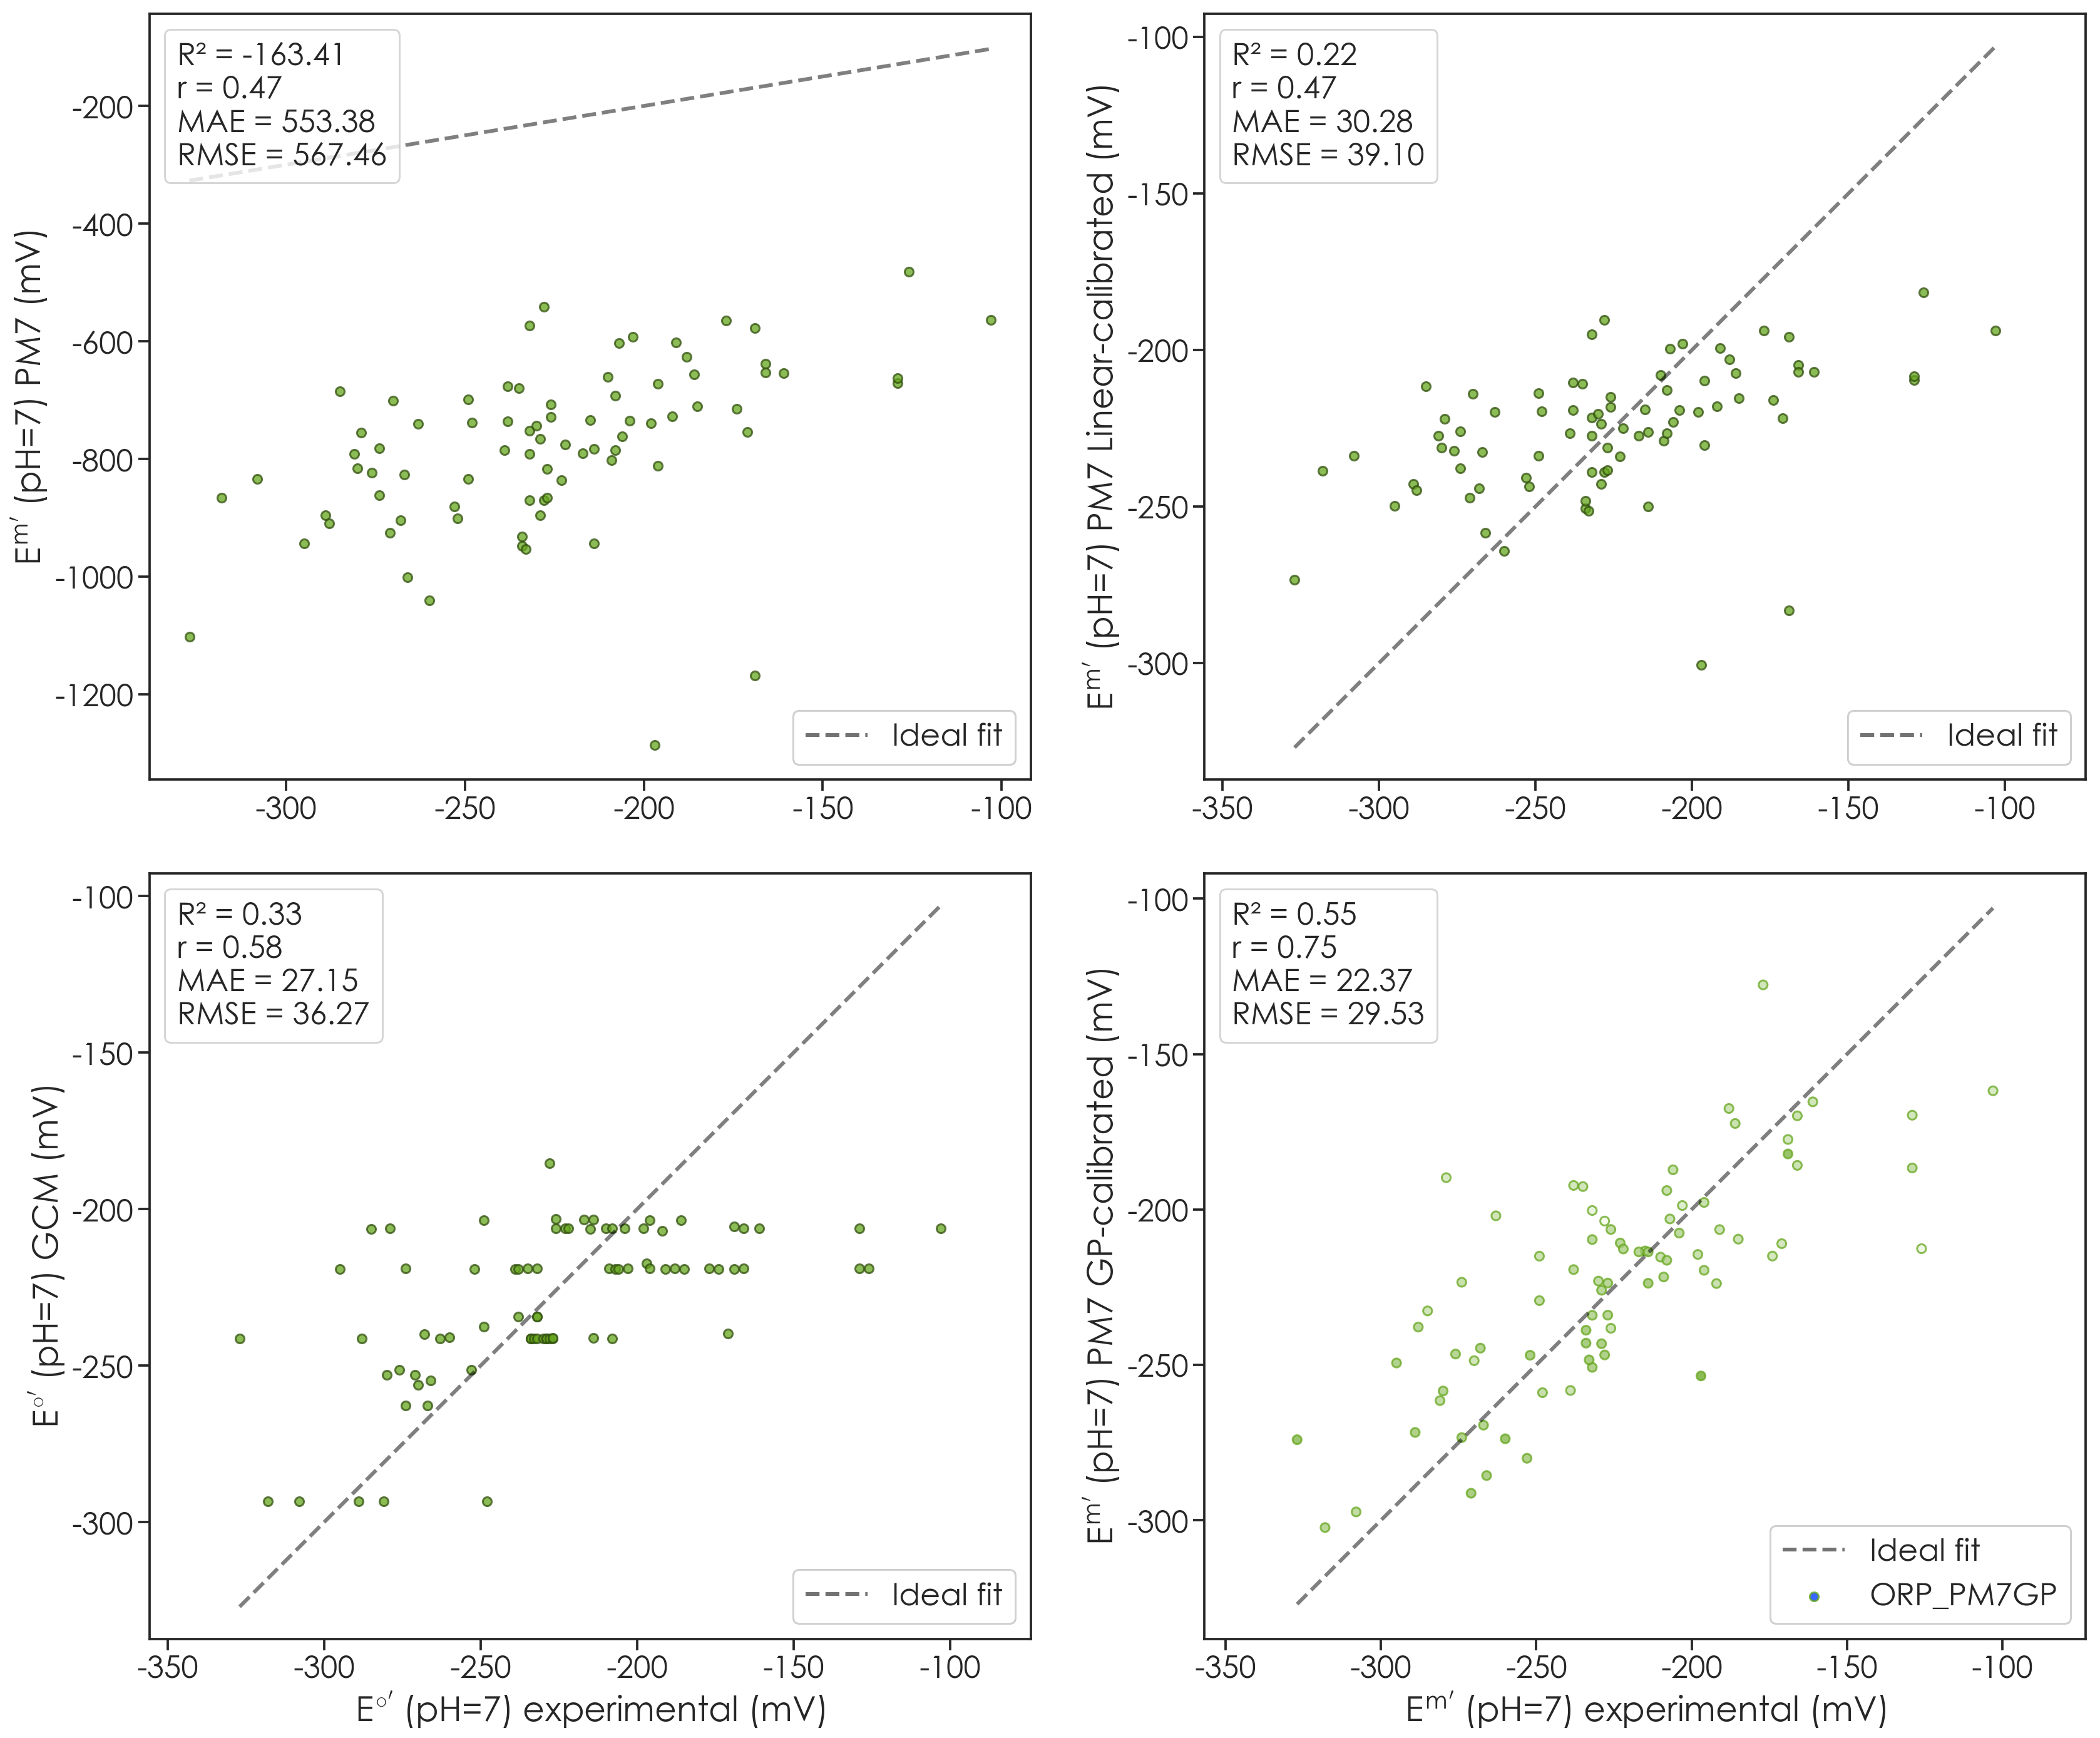

In [41]:
#awe.plot_settings()
col=gp.cols[diff_label]
cmap=gp.cmaps[diff_label]
sns.set_context('talk', font_scale=1.5)
plt.figure(figsize=(12*2,20))
plt.subplot(2, 2, 1)
y = df[baseline]
x = df[target]
gpm.utils.plotting.data_scatter(x=x,y=y,label_x=target,label_y=baseline,col=col)
plt.title('')
plt.ylabel('$E^{{m}^\prime}$ (pH=7) PM7 ($mV$)')
plt.xlabel('')
plt.subplot(2, 2, 2)
y = df[linfit]
x = df[target]
gpm.utils.plotting.data_scatter(x=x,y=y,label_x=target,label_y=linfit,col=col)
plt.title('')
plt.ylabel('$E^{{m}^\prime}$ (pH=7) PM7 Linear-calibrated ($mV$)')
plt.xlabel('')
plt.axis('equal')
plt.tight_layout()

plt.subplot(2, 2, 3)
y = df["ORP_GCM"]
x = df[target]
gpm.utils.plotting.data_scatter(x=x,y=y,label_x=target,label_y="ORP_GCM",col=col)
plt.tight_layout()
plt.ylabel('$E^{{\circ}^\prime}$ (pH=7) GCM ($mV$)')
plt.xlabel('$E^{{\circ}^\prime}$ (pH=7) experimental ($mV$)')
plt.axis('equal')
plt.tight_layout()
plt.subplot(2, 2, 4)
y = df[calib_label]
x = df[target]
z = df[calib_label+'_std']
plt.scatter(x,y,c=z,s=50,alpha=0.75,cmap=cmap,lw=1.5,edgecolor=col)
gpm.utils.plotting.data_scatter_extras(x, y)
plt.title('')
plt.ylabel('$E^{{m}^\prime}$ (pH=7) PM7 GP-calibrated ($mV$)')
plt.xlabel('$E^{{m}^\prime}$ (pH=7) experimental ($mV$)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Calibrate PM7 results
## Load calculation data

In [68]:
df = pd.read_csv('data/redox_results.csv')
print(df.shape)

(314435, 10)


## Batch calibrate

In [72]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

for index in chunker(df.index.tolist(),1024):
    df.loc[index,linfit]= linear_fit(df.loc[index,baseline].values)
    X_chunk = preproc.transformX(df.loc[index])
    Y_pred,Y_std = gp.predict(X_chunk)
    df.loc[index,calib_label]=df.loc[index,linfit]+Y_pred.flatten()
    df.loc[index,calib_label+'_std']=df.loc[index,linfit]+Y_std.flatten()
print(df.shape)
df.to_csv('data/redox_results.csv',index=False)
df.head(1)


 50%|█████     | 155/307 [02:14<02:17,  1.11it/s]


100%|██████████| 307/307 [04:51<00:00,  1.11s/it]
308it [04:51,  1.23it/s]                         


(314435, 13)


,rxn_ID,category,label_l,label_r,smiles_r,smiles_l,n_carbonyls,n_carboxyls,rxnediff_PM7,ORP_PM7,ORP_PM7linfit,ORP_PM7GP,ORP_PM7GP_std
0,Z00005 = Z00018,2,['Z00005'],['Z00018'],CCO,CC=O,1,0,18.18,-808.15,-229.92,-224.85,-211.73
